# Input Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd 
import imageio

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageOps
import scipy.ndimage as ndi

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Activation, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, load_img
from pathlib import Path
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing import image
from keras.utils import plot_model

Using TensorFlow backend.


In [0]:
print(os.listdir("drive/Shared drives/STA221 - Final Project/datash"))

['Names.csv', 'Submit.csv', 'test', 'train']


In [0]:
#setting up path for data
train_path = Path('drive/Shared drives/STA221 - Final Project/datash/train/train')
test_path = Path('drive/Shared drives/STA221 - Final Project/datash/test/test')
test_path_model = Path('drive/Shared drives/STA221 - Final Project/datash/test')
normal_data_path = train_path / 'NORMAL'
covid_data_path = train_path / 'COVID19 AND PNEUMONIA'

In [0]:
def plot_imgs(item_dir, num_imgs=25):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(10, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)

        img = plt.imread(img_path)
        plt.imshow(img)

    plt.tight_layout()

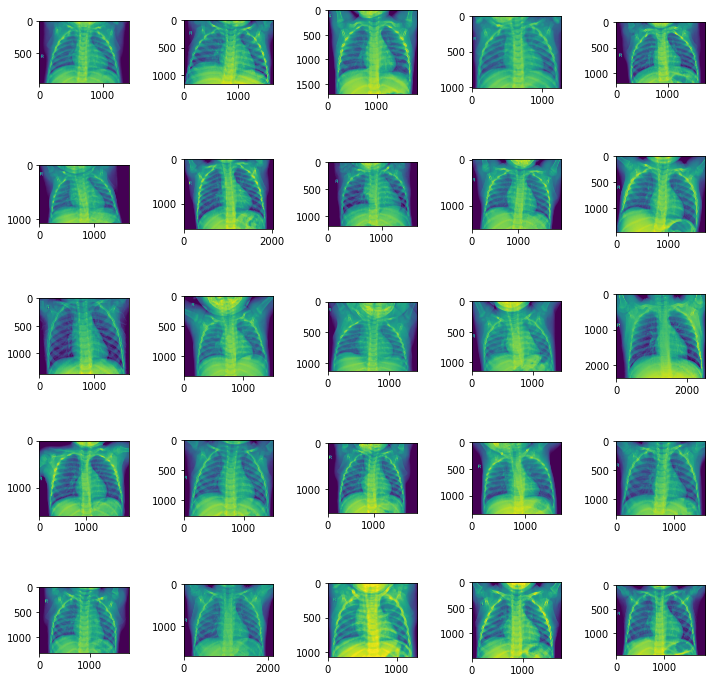

In [0]:
#Some photos of healthy people
plot_imgs(normal_data_path)

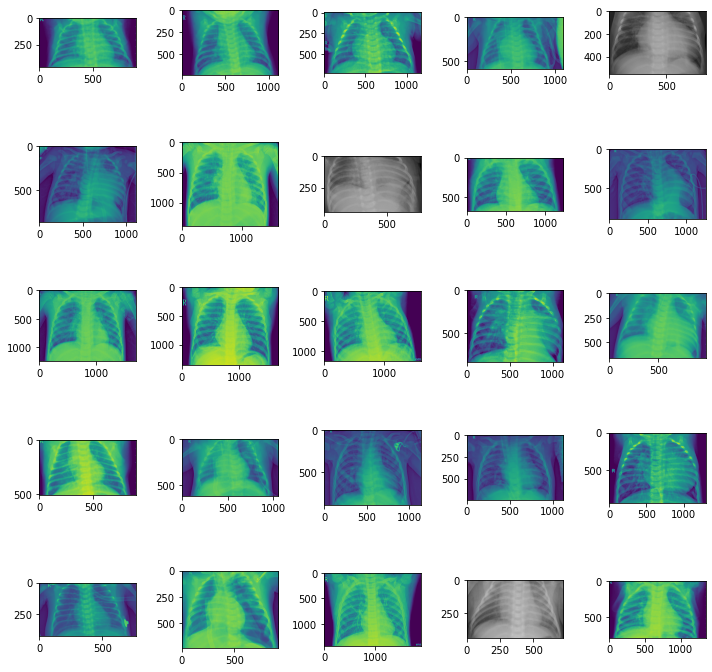

In [0]:
# Some photos of sick patients
plot_imgs(covid_data_path)

# Histograms and resizing

In [0]:
def plot_img_hist(item_dir, num_img=6):
  all_item_dirs = os.listdir(item_dir)
  item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_img]
  
  #plt.figure(figsize=(10, 10))
  for idx, img_path in enumerate(item_files):
    fig1 = plt.figure(idx,figsize=(10, 10))
    fig1.add_subplot(2, 2, 1)
    img = mpimg.imread(img_path, )
    plt.imshow(img)
    fig1.add_subplot(2, 2, 2)
    plt.hist(img.ravel(),bins=256, fc='k', ec='k')
  
  plt.tight_layout()

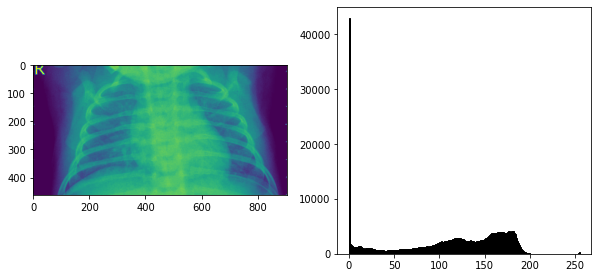

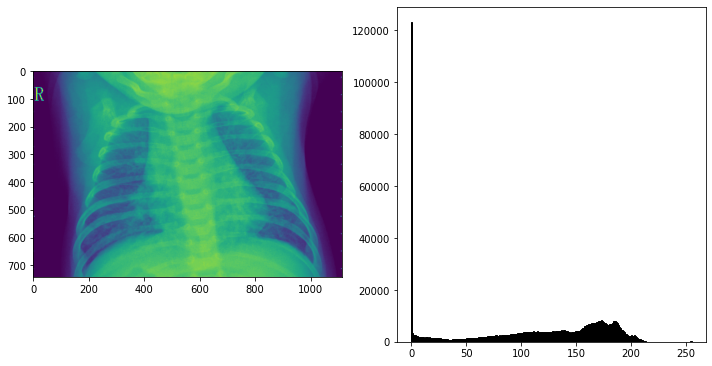

In [0]:
plot_img_hist(covid_data_path,2)

In [0]:
def plot_img_hist_ndi(item_dir, num_img=6):
  all_item_dirs = os.listdir(item_dir)
  item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_img]
  
  #plt.figure(figsize=(10, 10))
  for idx, img_path in enumerate(item_files):
    im = imageio.imread(img_path)
    hist = ndi.histogram(im, min=0, max=255, bins=256)
    cdf = hist.cumsum() / hist.sum()
    
    fig1 = plt.figure(idx,figsize=(10, 10))
    fig1.add_subplot(2, 3, 1)
    img = mpimg.imread(img_path, )
    plt.title("No. {}".format(idx))
    plt.imshow(img)
    fig1.add_subplot(2, 3, 2)
    plt.title("Histogram")
    plt.plot(hist)
    fig1.add_subplot(2, 3, 3)
    plt.title("CDF")
    plt.plot(cdf)

  plt.tight_layout()

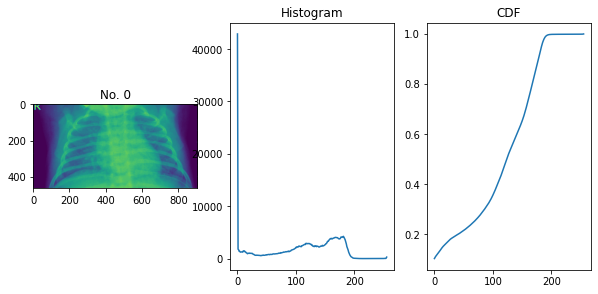

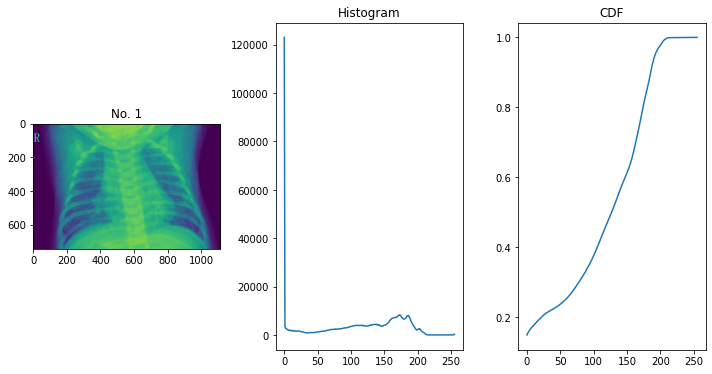

In [0]:
plot_img_hist_ndi(covid_data_path,2)

# Resizing

In [0]:
def image_resizing(path_from, path_to, height=500, width=500):
    size = height, width
    i=1
    files = os.listdir(path_from)
    for file in files: 
        try:
            file_dir = os.path.join(path_from, file)
            file_dir_save = os.path.join(path_to, file)
            img = Image.open(file_dir)
            img = img.resize(size, Image.ANTIALIAS)
            img = img.convert("RGB")
            img.save(file_dir_save) 
            i=i+1
        except:
            continue

# Modeling

In [0]:
img_size_h = 300
img_size_w = 300

input_shape = (img_size_h, img_size_w, 1) 

In [0]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=input_shape),
    MaxPool2D((2, 2)),
    
    Conv2D(32, (3,3)),
    MaxPool2D((2, 2)),
    
    Conv2D(64, (3,3)),
    MaxPool2D((2, 2)),
    
    Conv2D(64, (3,3)),
    MaxPool2D((2, 2)),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
    
    
])

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 33, 33, 64)       

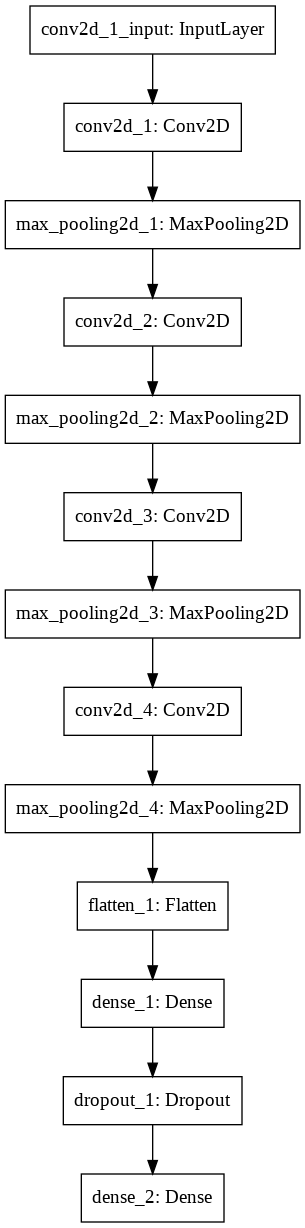

In [0]:
plot_model(model) #you can save picture with addin option to_file='model.png'

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,    
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=45,
    width_shift_range=0.5,
    height_shift_range=0.5,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.5,
    height_shift_range=0.5,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [12]:
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_size_h, img_size_w),
    color_mode='grayscale', #we use grayscale images I think
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True, #we shuffle our images for better performance
    seed=8)

validation_generator = val_datagen.flow_from_directory(
    test_path_model,
    target_size=(img_size_h, img_size_w),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    seed=8)

Found 5266 images belonging to 2 classes.
Found 690 images belonging to 1 classes.


In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001) #0.00001
callback = [learning_rate_reduction]

# Training

In [14]:
history = model.fit_generator(
    train_generator,
    epochs=10,
    callbacks = callback
    )


Epoch 1/10


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


165/165 [==============================] - 1555s 9s/step - loss: 0.6116 - accuracy: 0.7370
Epoch 2/10


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


165/165 [==============================] - 97s 587ms/step - loss: 0.5879 - accuracy: 0.7452
Epoch 3/10
165/165 [==============================] - 97s 586ms/step - loss: 0.5765 - accuracy: 0.7427
Epoch 4/10
165/165 [==============================] - 97s 589ms/step - loss: 0.4976 - accuracy: 0.7465
Epoch 5/10
165/165 [==============================] - 98s 593ms/step - loss: 0.4443 - accuracy: 0.7461
Epoch 6/10
165/165 [==============================] - 98s 593ms/step - loss: 0.6371 - accuracy: 0.7453
Epoch 7/10
165/165 [==============================] - 99s 599ms/step - loss: 0.6038 - accuracy: 0.7450
Epoch 8/10
165/165 [==============================] - 99s 597ms/step - loss: 0.5876 - accuracy: 0.7453
Epoch 9/10
165/165 [==============================] - 99s 600ms/step - loss: 0.5789 - accuracy: 0.7453
Epoch 10/10
165/165 [==============================] - 98s 596ms/step - loss: 0.5743 - accuracy: 0.7453


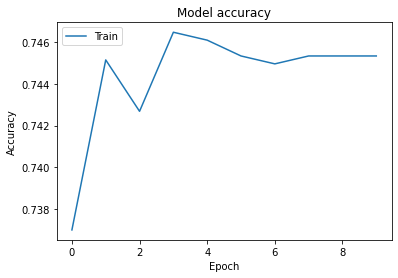

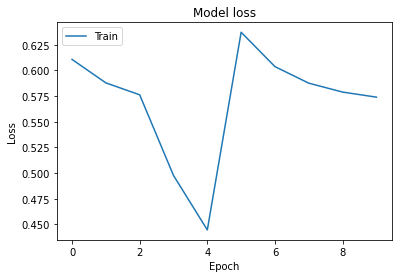

In [17]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()